In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
train=pd.read_csv('C:\\YoussefENSI\\Spaceship titanic\\train.csv')
test=pd.read_csv('C:\\YoussefENSI\\Spaceship titanic\\test.csv')

In [3]:
df_train=train.copy()
X_pred=test.copy()

In [4]:
df_train.shape

(8693, 14)

In [5]:
(df_train.isna().sum()/df_train.shape[0]).sort_values(ascending=True)

PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
dtype: float64

### (8693, 14):shape
- **cabin: binary P /S**
- **PassengerId/Name:are multiple uniques,probably will be dropped later**
- **Transported:the target variable**


In [6]:
X_train=df_train.drop(['Transported'],axis=1)
y_train=df_train.Transported

In [7]:
df_train.Transported.value_counts()


True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
for col in X_train:
    print(f"\n\nUnique Values in {col:-<50}:")
    print(X_train[col].value_counts())



Unique Values in PassengerId---------------------------------------:
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64


Unique Values in HomePlanet----------------------------------------:
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


Unique Values in CryoSleep-----------------------------------------:
False    5439
True     3037
Name: CryoSleep, dtype: int64


Unique Values in Cabin---------------------------------------------:
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


Unique Values in Destination---------------------------------------:
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


Unique Values in Age--------

In [10]:
df_train.drop(['Name','PassengerId'],axis=1,inplace=True)
X_pred.drop(['Name','PassengerId'],axis=1,inplace=True)


In [11]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
df_train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [13]:
scale_mapper = {True:1, False:0}
df_train.Transported = df_train.Transported.replace(scale_mapper)

scale_mapper = {True:1, False:0}
df_train.VIP = df_train.VIP.replace(scale_mapper)

scale_mapper = {True:1, False:0}
df_train.CryoSleep = df_train.CryoSleep.replace(scale_mapper)

In [14]:
scale_mapper = {True:1, False:0}
X_pred.VIP = X_pred.VIP.replace(scale_mapper)

scale_mapper = {True:1, False:0}
X_pred.CryoSleep = X_pred.CryoSleep.replace(scale_mapper)

In [15]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


In [16]:
for col in ['Destination','HomePlanet']:
    one_hot = pd.get_dummies(df_train[col])
    # Drop column as it is now encoded
    df_train = df_train.drop(col,axis = 1)
    # Join the encoded df
    df_train = df_train.join(one_hot)
    df_train 


In [17]:
for col in ['Destination','HomePlanet']:
    one_hot = pd.get_dummies(X_pred[col])
    # Drop column as it is now encoded
    X_pred = X_pred.drop(col,axis = 1)
    # Join the encoded df
    X_pred = X_pred.join(one_hot)
    
    X_pred

In [18]:
df_train.select_dtypes('object')

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
...,...
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S


sns.histplot(x=df_train['Cabin'],data=df_train)

sns.countplot(x=df_train['Cabin'])

Cabin is in form deck/num/side then we should split it

In [19]:
df_train[['Deck','Num','Side']]=df_train['Cabin'].str.split('/',n=2,expand=True)


In [20]:
X_pred[['Deck','Num','Side']]=X_pred['Cabin'].str.split('/',n=2,expand=True)


In [21]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [22]:
X_pred.drop(['Cabin'],axis=1,inplace=True)

In [23]:
df_train.Side.value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [24]:
scale_mapper = {'S':1, 'P':0}
df_train.Side = df_train.Side.replace(scale_mapper)

In [25]:
scale_mapper = {'S':1, 'P':0}
X_pred.Side = X_pred.Side.replace(scale_mapper)

In [26]:
len(df_train.Num.unique())

1818

In [27]:
len(df_train.Deck.unique())

9

In [28]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df_train.Deck=le.fit_transform(df_train.Deck)

In [29]:
X_pred.Deck=le.fit_transform(X_pred.Deck)

In [30]:
X_pred

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars,Deck,Num,Side
0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,6,3,1.0
1,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,0,0,1,1,0,0,5,4,1.0
2,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,2,0,1.0
3,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0,0,1,0,1,0,2,1,1.0
4,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,0,0,1,1,0,0,5,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,6,1496,1.0
4273,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,0,0,1,1,0,0,8,NaN,NaN
4274,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,3,296,0.0
4275,0.0,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,0,0,0,0,1,0,3,297,0.0


In [31]:
#we are gonna replace the nan vals

for col in df_train.drop(['Transported'],axis=1).columns:
    # most frequent value in Team
    mostF=df_train[col].median()
    df_train[col].fillna(mostF,inplace=True)
    
    mostFtest=X_pred[col].median()
    X_pred[col].fillna(mostFtest,inplace=True)
    
#X_train=df_train.drop(['Transported'],axis=1)
#y_train=df_train['Transported']

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

# TrainTestSlpit

In [33]:
trainn,testt=train_test_split(df_train,random_state=0,test_size=0.15)#best 

X_train=trainn.drop(['Transported'],axis=1)
X_test=testt.drop(['Transported'],axis=1)
y_train=trainn.Transported
y_test=testt.Transported

In [370]:


d=RandomForestClassifier(random_state=0,max_depth=100,max_leaf_nodes=800)
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
m=BaggingClassifier(d)
ada=AdaBoostClassifier(random_state=0)
g=GradientBoostingClassifier(random_state=0)
model3 = KNeighborsClassifier(n_neighbors=40)
model1 = SGDClassifier(random_state=0)
model4=VotingClassifier([('bag',d),('ada',ada)],voting='hard')#,('DT',m)

In [371]:
d.fit(X_train,y_train)
m.fit(X_train,y_train)
print(f'RFC\nscore : {d.score(X_test,y_test)}')
print(f'recall_score : {recall_score(d.predict(X_test),y_test)}')
print(f'precision_score : {sklearn.metrics.precision_score(d.predict(X_test),y_test)}')


print(f'BC\nscore : {m.score(X_test,y_test)}')
print(f'recall_score : {recall_score(m.predict(X_test),y_test)}')
print(f'precision_score : {sklearn.metrics.precision_score(m.predict(X_test),y_test)}')


RFC
score : 0.8159509202453987
recall_score : 0.816358024691358
precision_score : 0.8138461538461539
BC
score : 0.8182515337423313
recall_score : 0.8314606741573034
precision_score : 0.796923076923077


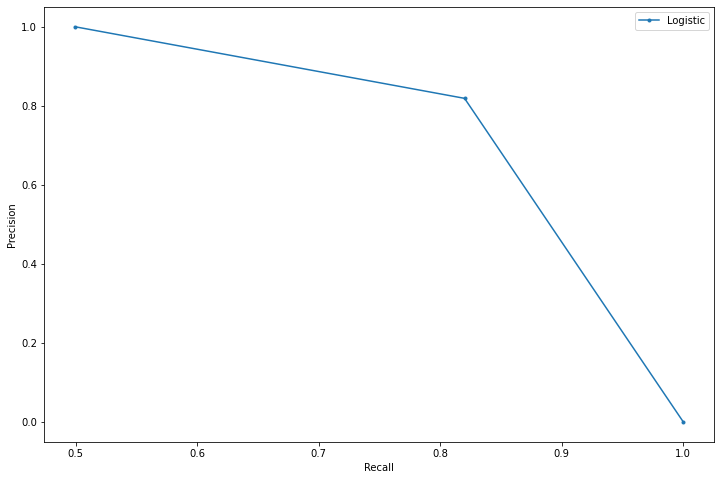

In [307]:
l,ll,r=sklearn.metrics.precision_recall_curve(d.predict(X_test),y_test)
plt.figure(figsize=(12,8))
plt.plot(l,ll,marker='.',label='Logistic')#fait attention train_score.mean(axis=1)
    #plt.plot(N,val_score.mean(axis=1),label='validation score')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

X_test.fillna(0,inplace=True)

for model in [model1,d,model3,model4,m,g]:
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

In [217]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score,recall_score,f1_score,classification_report,confusion_matrix

In [372]:
y_pred=d.predict(X_test)
y_pred_VC=m.predict(X_test)

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred_VC,y_test))
print(confusion_matrix(y_pred_VC,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       656
           1       0.81      0.82      0.82       648

    accuracy                           0.82      1304
   macro avg       0.82      0.82      0.82      1304
weighted avg       0.82      0.82      0.82      1304

[[535 121]
 [119 529]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       681
           1       0.80      0.83      0.81       623

    accuracy                           0.82      1304
   macro avg       0.82      0.82      0.82      1304
weighted avg       0.82      0.82      0.82      1304

[[549 132]
 [105 518]]


0       0.84      0.81      0.82       
1       0.80      0.83      0.81       
m :0789Kaggle

- **0.7377803335250144 median
- **0.726279470960322 [.value_counts().idxmin()]:most frequent//fill with 0
- **0.7717078780908568 with knearestneigbor

from sklearn.ensemble import StackingClassifier

model = StackingClassifier([('SGD',g),('DT',m),('KN',model3)],final_estimator=RandomForestClassifier())
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [373]:
Y=m.predict(X_pred)

In [374]:
scale_mapper = {1:True, 0:False}
Y=pd.DataFrame(Y,columns=['Transported']).replace(scale_mapper)


In [375]:
Y

,Transported
0,True
1,False
2,True
3,True
4,True
...,...
4272,False
4273,False
4274,True
4275,True


In [376]:
output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Transported': Y.Transported} )
output.to_csv('submission00.csv', index=False)

we got a score of 0.75 on kaggleVoting classifier

second submission with RandomForestClassifoer() 0.79120

In [157]:

params_grid={'random_state':[0],'max_leaf_nodes':[1,2,5,10,15],'max_features':[3,5,10,15],'max_depth':[1,2,5,15]}#RSC
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(RandomForestClassifier(),params_grid,scoring='precision',cv=5)

grid.fit(X_train,y_train)

C:\Users\THiNKBooK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\THiNKBooK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\THiNKBooK\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\THiNKBooK\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\THiNKBooK\anaconda3

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 5, 15],
                         'max_features': [3, 5, 10, 15],
                         'max_leaf_nodes': [1, 2, 5, 10, 15],
                         'random_state': [0]},
             scoring='precision')

In [158]:
grid.best_params_

{'max_depth': 15, 'max_features': 3, 'max_leaf_nodes': 15, 'random_state': 0}

df_train.select_dtypes('float').z_score().sort_values()

df_train['Cs*2']=df_train.CryoSleep**2
X_pred['Cs*2']=X_pred.CryoSleep**2

C:\Users\THiNKBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\THiNKBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\THiNKBooK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

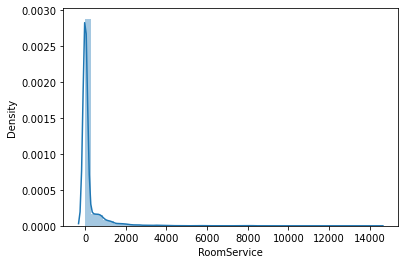

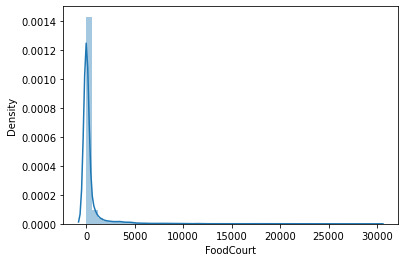

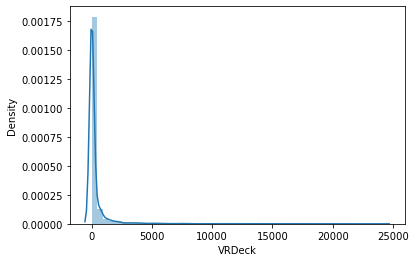

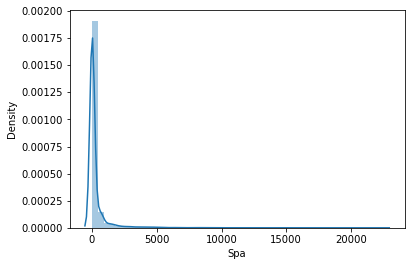

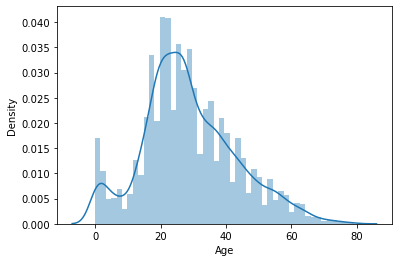

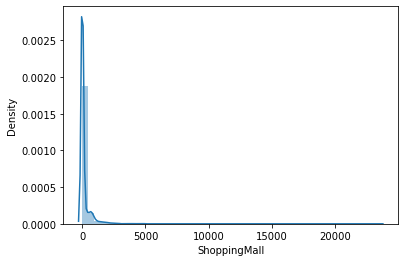

In [44]:
for col in ['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall']:
    plt.figure()
    sns.distplot(df_train[col])

In [45]:
df_train_corr=df_train.corr()['Transported'][:]

In [46]:
top_features=abs(df_train_corr).sort_values(ascending=False)
print(f"These are the {len(top_features)} correlated to the target variable \n{top_features}")

These are the 17 correlated to the target variable 
Transported      1.000000
CryoSleep        0.460132
RoomService      0.241124
Spa              0.218545
VRDeck           0.204874
Europa           0.176916
Earth            0.169019
Deck             0.109925
55 Cancri e      0.108722
Side             0.101397
TRAPPIST-1e      0.094700
Age              0.074233
FoodCourt        0.045583
VIP              0.037261
Mars             0.019544
ShoppingMall     0.009391
PSO J318.5-22    0.000092
Name: Transported, dtype: float64


none of them are well correlated

# **Scalling**

In [47]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

In [48]:
r=RobustScaler()
t=MinMaxScaler()
s=StandardScaler()

In [49]:
df_train['Total_Sent']=df_train[['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall']].sum(axis=1)
X_pred['Total_Sent']=X_pred[['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall']].sum(axis=1)





In [50]:
df_train[['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall','Transported','Total_Sent']].describe()

,RoomService,FoodCourt,VRDeck,Spa,Age,ShoppingMall,Transported,Total_Sent
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,220.009318,448.434027,298.261820,304.588865,28.790291,169.572300,0.503624,1440.866329
std,660.519050,1595.790627,1134.126417,1125.562559,14.341404,598.007164,0.500016,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,716.000000
75%,41.000000,61.000000,40.000000,53.000000,37.000000,22.000000,1.000000,1441.000000
max,14327.000000,29813.000000,24133.000000,22408.000000,79.000000,23492.000000,1.000000,35987.000000


In [51]:
df_train['Age']=t.fit_transform(df_train['Age'][:,np.newaxis])#MaxMin reduces performance

C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\2243179595.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train['Age']=t.fit_transform(df_train['Age'][:,np.newaxis])#MaxMin reduces performance


In [52]:
X_pred['Age']=t.fit_transform(X_pred['Age'][:,np.newaxis])#MaxMin reduces performance

C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\1955376877.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pred['Age']=t.fit_transform(X_pred['Age'][:,np.newaxis])#MaxMin reduces performance


In [53]:
for col in ['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall','Total_Sent']:
    df_train[col]=t.fit_transform(df_train[col][:,np.newaxis])
#both scaler work the same

C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\2112861327.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train[col]=t.fit_transform(df_train[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\2112861327.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train[col]=t.fit_transform(df_train[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\2112861327.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_train[col]=t.fit_transform(df_train[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\2112861327.p

In [54]:
for col in ['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall','Total_Sent']:
    X_pred[col]=t.fit_transform(X_pred[col][:,np.newaxis])
#both scaler work the same

C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\3708061268.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pred[col]=t.fit_transform(X_pred[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\3708061268.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pred[col]=t.fit_transform(X_pred[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\3708061268.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pred[col]=t.fit_transform(X_pred[col][:,np.newaxis])
C:\Users\THiNKBooK\AppData\Local\Temp\ipykernel_276\3708061268.py:2: FutureW

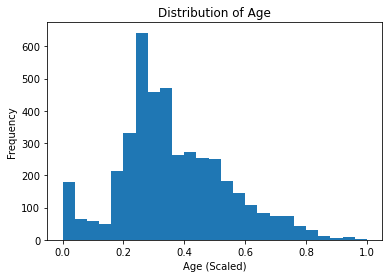

In [55]:
ax = plt.axes()
ax.hist(X_pred.Age, bins=25);

ax.set(xlabel='Age (Scaled)', 
       ylabel='Frequency',
       title='Distribution of Age');

In [56]:
X_pred

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars,Deck,Num,Side,Total_Sent
0,1.0,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,1,1,0,0,6,3,1.0,0.000000
1,0.0,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0,0,1,1,0,0,5,4,1.0,0.084120
2,1.0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,0,1,0,2,0,1.0,0.000000
3,0.0,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0,0,1,0,1,0,2,1,1.0,0.220341
4,0.0,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0,0,1,1,0,0,5,5,1.0,0.019159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.430380,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,1,1,0,0,6,1496,1.0,0.000000
4273,0.0,0.531646,0.0,0.000000,0.033514,0.00205,0.000504,0.006466,0,0,1,1,0,0,8,442.0,1.0,0.030238
4274,1.0,0.329114,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,0,0,1,3,296,0.0,0.000000
4275,0.0,0.329114,0.0,0.000000,0.106042,0.00000,0.000000,0.023482,0,0,0,0,1,0,3,297,0.0,0.095140


# **Normal Distribution SKEW**

In [57]:
df_train.skew()


CryoSleep         0.632024
Age               0.431102
VIP               6.381293
RoomService       6.397766
FoodCourt         7.177515
ShoppingMall     12.763842
Spa               7.716450
VRDeck            7.904554
Transported      -0.014497
55 Cancri e       1.446133
PSO J318.5-22     2.832741
TRAPPIST-1e      -0.774009
Earth            -0.117790
Europa            1.185132
Mars              1.482042
Deck             -0.786829
Num               0.746458
Side             -0.064695
Total_Sent        4.417588
dtype: float64

<Figure size 432x288 with 0 Axes>

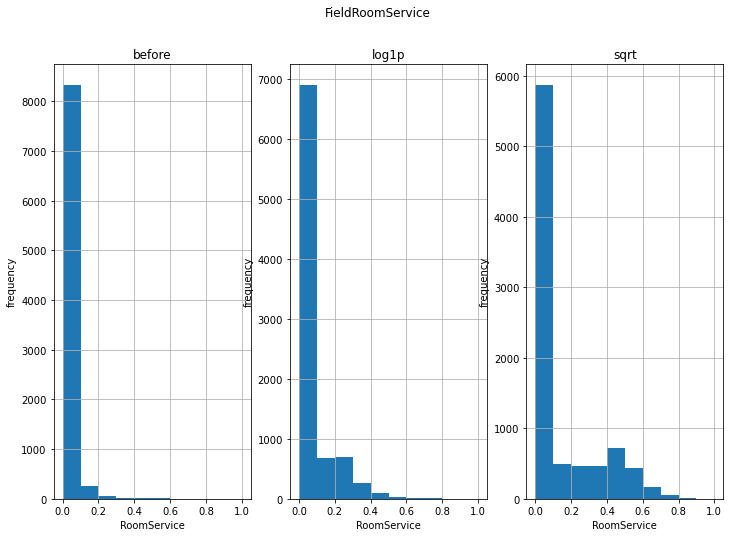

<Figure size 432x288 with 0 Axes>

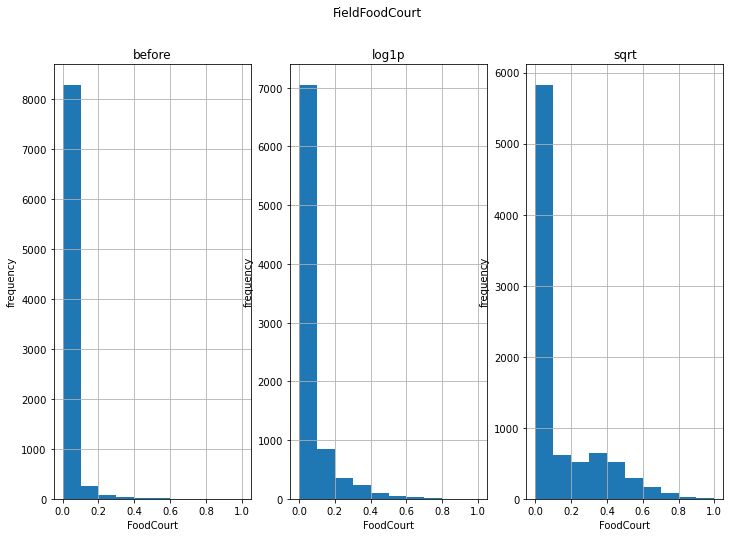

<Figure size 432x288 with 0 Axes>

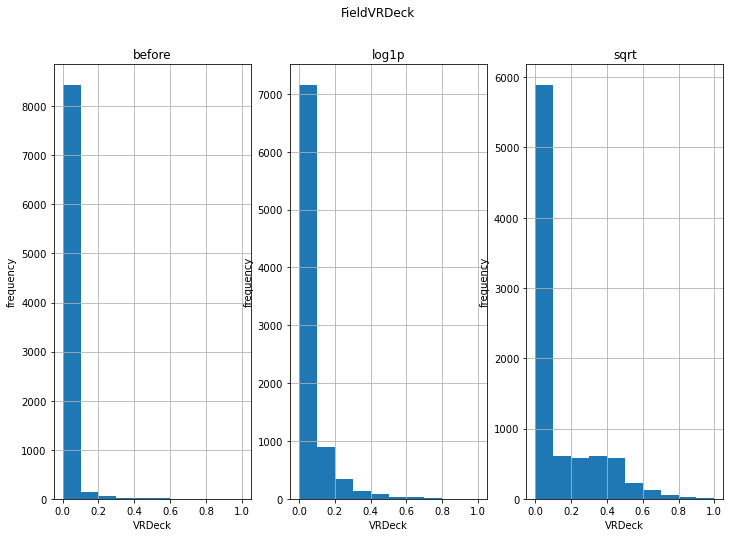

<Figure size 432x288 with 0 Axes>

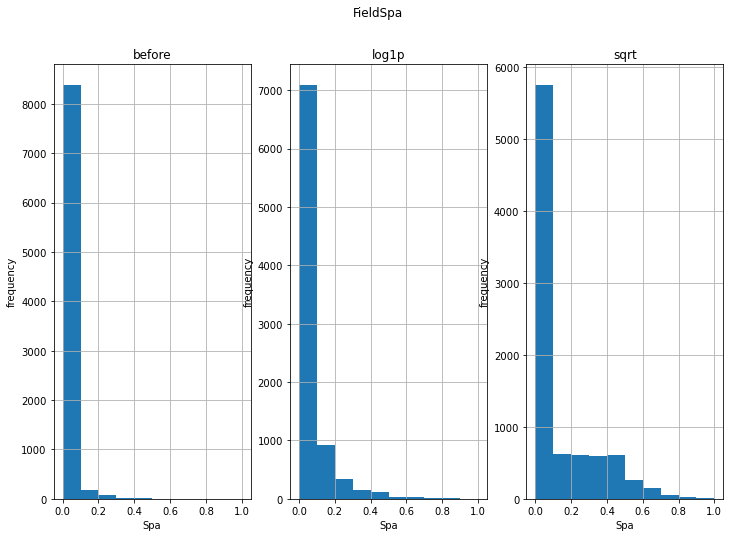

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

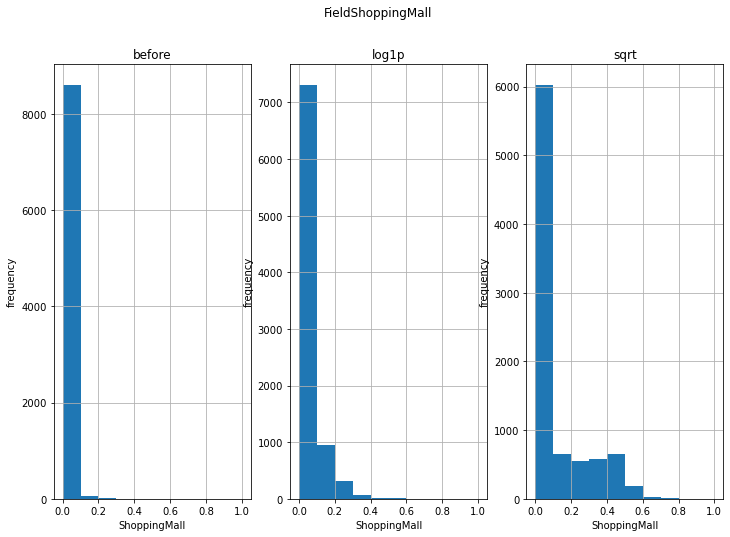

<Figure size 432x288 with 0 Axes>

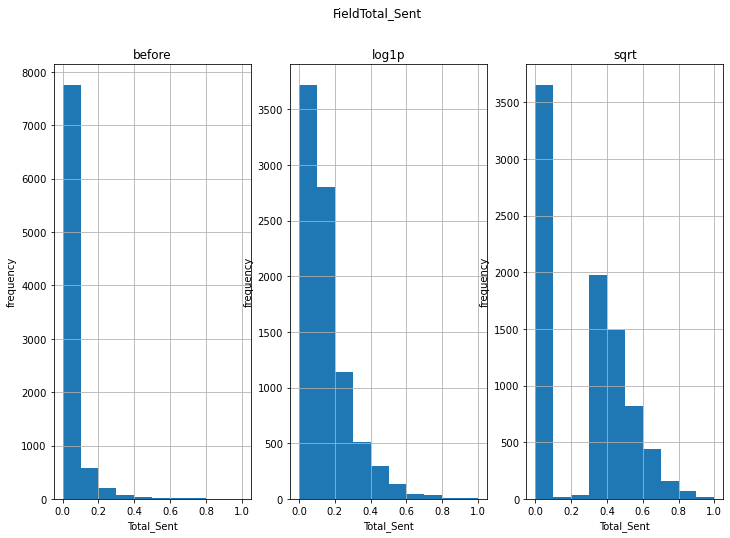

In [58]:

#fig,(ax_before,ax_log1p,ax_sqrt)=plt.subplots(1,3,figsize=(12,8))
for field in ['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall','Total_Sent']:
    plt.figure()
    if abs(df_train[field].skew())>0.75:
        fig,(ax_before,ax_log1p,ax_sqrt)=plt.subplots(1,3,figsize=(12,8))
        df_train[field].hist(ax=ax_before)
        df_train[field].apply(np.sqrt).hist(ax=ax_log1p)
        df_train[field].apply(np.sqrt).apply(np.sqrt).hist(ax=ax_sqrt)
        ax_before.set(title='before',ylabel='frequency',xlabel=field)
        ax_log1p.set(title='log1p',ylabel='frequency',xlabel=field)
        ax_sqrt.set(title='sqrt',ylabel='frequency',xlabel=field)
        fig.suptitle(f'Field{field}')

df_train['Age']=r.fit_transform(df_train["Age"][:,np.newaxis])

In [59]:
for col in ['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall','Total_Sent']:
    if df_train[col].skew()>0.75:
        df_train[col]=df_train[col].apply(np.sqrt).apply(np.sqrt)#twice but make sure data is positif
        X_pred[col]=X_pred[col].apply(np.sqrt).apply(np.sqrt)

###### - comeback log1p/ cb sqrt np.square
for col in ['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall']:
    #if df_train[col].skew()>0.75:
    df_train[col]=df_train[col].apply(np.expm1)

### polynomial feat with crysleep and total spent

In [60]:
df_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', '55 Cancri e', 'PSO J318.5-22',
       'TRAPPIST-1e', 'Earth', 'Europa', 'Mars', 'Deck', 'Num', 'Side',
       'Total_Sent'],
      dtype='object')

df_train['Cr_To']=df_train.CryoSleep*df_train.Total_Sent
X_test['Cr_To']=X_test.CryoSleep*X_test.Total_Sent



In [71]:
trainn,testt=train_test_split(df_train,random_state=0,test_size=0.15)#best 

X_train=trainn.drop(['Transported'],axis=1)
X_test=testt.drop(['Transported'],axis=1)
y_train=trainn.Transported
y_test=testt.Transported

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


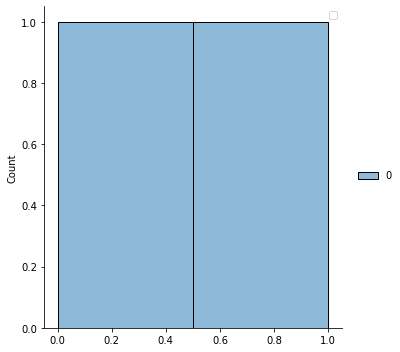

In [95]:
sns.displot(df_train.groupby('VIP')['Transported'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


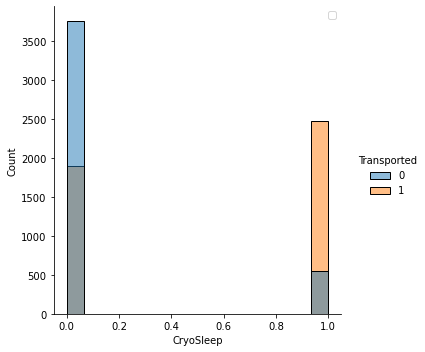

In [110]:
sns.displot(x='CryoSleep',data=df_train,hue='Transported')
plt.legend()

C:\Users\THiNKBooK\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


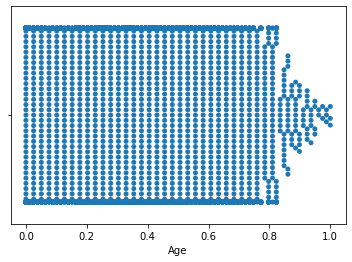

In [109]:
ax = sns.swarmplot(data=df_train, x="Age", hue="Transported")

In [77]:
(df_train.groupby('Num')['Transported']).head()

0       0
1       1
2       0
3       0
4       1
       ..
8684    1
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6028, dtype: int64

df_train['Total_Sent']=df_train[['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall']].sum(axis=1)
X_test['Total_Sent']=X_test[['RoomService','FoodCourt','VRDeck','Spa','ShoppingMall']].sum(axis=1)


In [73]:
d.fit(X_train,y_train)
y_pred=d.predict(X_test)
accuracy_score(y_pred,y_test)

0.8151840490797546

In [64]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       691
           1       0.79      0.83      0.81       613

    accuracy                           0.82      1304
   macro avg       0.82      0.82      0.82      1304
weighted avg       0.82      0.82      0.82      1304

[[552 139]
 [102 511]]


- **0.8151840490797546** MinMax-double sqrt- feature eng before scalling No POLYFEA

# Different evaluations using pipelines

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    N,train_score,val_score= learning_curve(model,X_train,y_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')#fait attention train_score.mean(axis=1)
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()

In [ ]:
preprocessor=make_pipeline(SelectKBest(f_classif,k=5))#include_bias=False pour les avertissemnet

random_forest= make_pipeline(preprocessor,RandomForestClassifier(random_state=0))

ada_boost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
svm = make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))#il faut ajouter un algorithme ge normalisation
kNN =make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

#list_models=[random_forest,kNN,svm,ada_boost]
list_models={'random_forest':random_forest,'kNN':kNN,'svm':svm,'ada_boost':ada_boost}

In [ ]:
for name,model in list_models.items() :
    print(name)
    evaluation(model)

In [ ]:
for model in [model1,d,model3,model4,m,g]:
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

In [ ]:
evaluation(random_forest)

In [ ]:
df_train.Num.value_counts()

df_train.VIP=pd.to_numeric(df_train['VIP'], downcast='integer')
for i in ['CryoSleep','Side','Num','Mars','Europa','Earth','TRAPPIST-1e','PSO J318.5-22','55 Cancri e']:
    df_train[i]=pd.to_numeric(df_train[i], downcast='integer')

In [ ]:
df_train.dtypes

for col in ['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall']:
    plt.figure()
    sns.distplot(df_train[col],df_train['Transported'])

In [ ]:
sns.set_context('talk')
sns.pairplot(df_train[['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall','Transported']], hue='Transported');

In [ ]:
plt.figure(figsize=(12,8))
df_train[['RoomService','FoodCourt','VRDeck','Spa','Age','ShoppingMall','Transported']].boxplot(by='Transported',figsize=(12,8));

In [ ]:
evaluation(random_forest)